In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("pricerunner_aggregate.csv")


In [3]:
df.head(10)

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
5,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
6,7,apple iphone 8 plus 64 gb space grey,7,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
7,8,apple iphone 8 plus 64gb space grey,8,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
8,9,apple iphone 8 plus 64gb space grey,9,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
9,10,apple iphone 8 plus 64gb space grey,10,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [4]:
df.tail(10)

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
35301,47345,hotpoint hul1622,341,47509,Hotpoint HUL162I,2623,Fridges
35302,47346,smeg fab28 60cm retro style left hand hinge fr...,59,47511,Smeg FAB28 Blue Blue,2623,Fridges
35303,47347,hotpoint ariston bdr 190 aai/ha refrigerator,324,47512,Ariston BDR190AAI Stainless Steel,2623,Fridges
35304,47348,exquisit ks 116 4. a top ws k hlschrank stand,119,47513,GGV Exquisit GGVKS116RV White,2623,Fridges
35305,47349,beko ra610w,341,47514,Beko RA610W White,2623,Fridges
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges
35310,47358,neff k4316x7gb built under larder fridge,179,47525,Neff K4316,2623,Fridges


In [5]:
df.describe()

,Product ID,Merchant ID,Cluster ID,Category ID
count,35311.000000,35311.000000,35311.000000,35311.000000
mean,26150.800176,120.501883,30110.687633,2618.142930
std,13498.191220,117.045557,18410.265642,3.600708
min,1.000000,1.000000,1.000000,2612.000000
25%,14958.500000,17.000000,6123.000000,2615.000000
50%,27614.000000,75.000000,40630.000000,2619.000000
75%,37508.500000,253.000000,44059.000000,2622.000000
max,47358.000000,371.000000,47525.000000,2623.000000


In [6]:
df.columns

Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label'],
      dtype='object')

In [7]:
col=['Product Title',' Category Label']
df=df[col]
df.head

<bound method NDFrame.head of                                            Product Title  Category Label
0                        apple iphone 8 plus 64gb silver   Mobile Phones
1                    apple iphone 8 plus 64 gb spacegrau   Mobile Phones
2      apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   Mobile Phones
3                    apple iphone 8 plus 64gb space grey   Mobile Phones
4      apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   Mobile Phones
...                                                  ...             ...
35306  smeg fab28 60cm retro style right hand hinge f...         Fridges
35307  smeg fab28 60cm retro style left hand hinge fr...         Fridges
35308  smeg fab28 60cm retro style left hand hinge fr...         Fridges
35309     candy 60cm built under larder fridge cru160nek         Fridges
35310           neff k4316x7gb built under larder fridge         Fridges

[35311 rows x 2 columns]>

In [8]:
vectorizer = CountVectorizer()
X_product = vectorizer.fit_transform(df['Product Title'])
# Hedef değişken ve özellikleri belirle
y = df[' Category Label']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_product,  # Vektörleştirilmiş metin verisi
    y,
    test_size=0.2,
    random_state=42
)

# Naive Bayes modelini oluştur ve eğit (MultinomialNB kullanıldı)
model = MultinomialNB()
hist=model.fit(X_train, y_train,)

y_pred = model.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("Naive Bayes Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Naive Bayes Model Metrics:
Accuracy: 0.9503044032280901
Precision: 0.9523113125694748
Recall: 0.9503044032280901
F1 Score: 0.9495163250279597


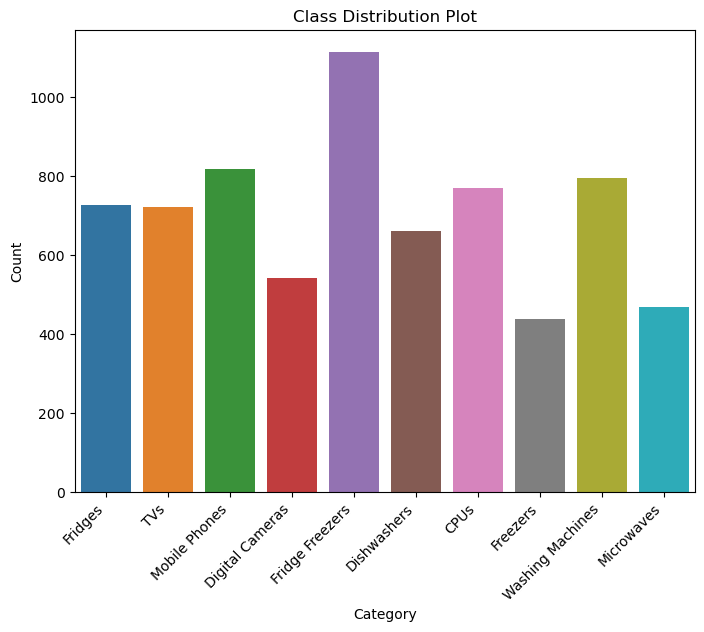

In [11]:

# Sınıf Dağılımı Grafiği
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_test)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution Plot')

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.show()


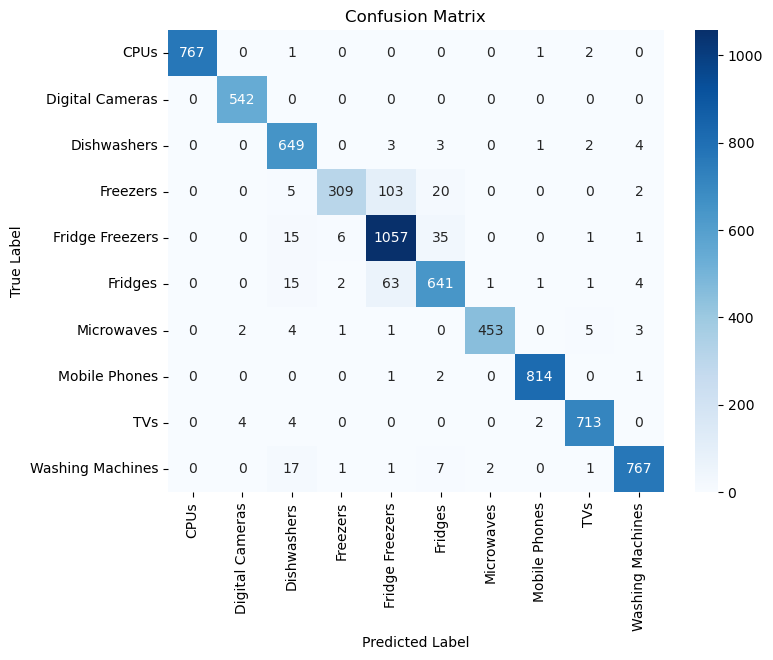


Classification Report:
                   precision    recall  f1-score   support

            CPUs       1.00      0.99      1.00       771
 Digital Cameras       0.99      1.00      0.99       542
     Dishwashers       0.91      0.98      0.95       662
        Freezers       0.97      0.70      0.82       439
 Fridge Freezers       0.86      0.95      0.90      1115
         Fridges       0.91      0.88      0.89       728
      Microwaves       0.99      0.97      0.98       469
   Mobile Phones       0.99      1.00      0.99       818
             TVs       0.98      0.99      0.98       723
Washing Machines       0.98      0.96      0.97       796

        accuracy                           0.95      7063
       macro avg       0.96      0.94      0.95      7063
    weighted avg       0.95      0.95      0.95      7063



In [12]:

# Get unique class labels
unique_labels = sorted(set(y_test) | set(y_pred))

# Print confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)
#print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report with labels
class_report = classification_report(y_test, y_pred, target_names=[str(label) for label in unique_labels])
print("\nClassification Report:\n", class_report)
